In [117]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [10]:
df = pd.read_csv('player_data.csv')
print(df.shape)

(4550, 8)


In [14]:
df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [16]:
df['long']= df['year_end']-df['year_start']

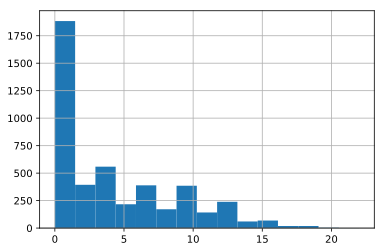

In [22]:
df['long'].hist(bins = 15)
# график показывает распределение длины карьеры

In [24]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

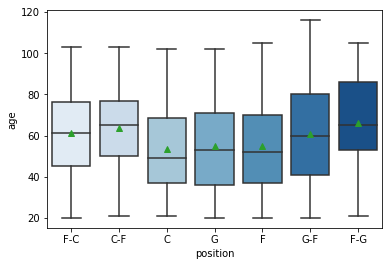

In [109]:
from datetime import datetime
df['birth_date'] =  pd.to_datetime(df['birth_date'], format='%B %d, %Y')
df['age'] = 2018- pd.DatetimeIndex(df['birth_date']).year #получили возраст 
%config InlineBackend.figure_format = 'png' 
sns.boxplot(x='position', y='age', data=df, showmeans=True, palette="Blues")  # осмотрели на распределение возраста в разных группах


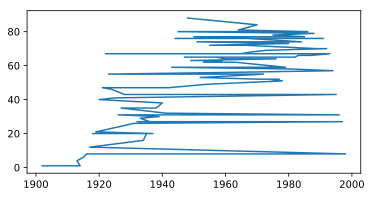

In [125]:
df['year'] = pd.DatetimeIndex(df['birth_date']).year 
position_df=df.year.value_counts()
position_df.plot()

ValueError: max must be larger than min in range parameter.

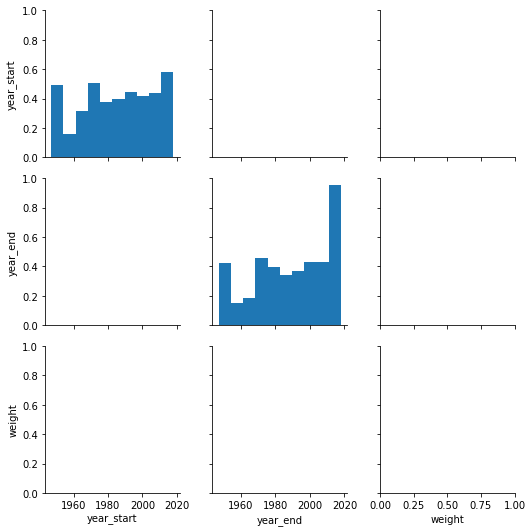

In [131]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df[['year_start', 'year_end', 'weight']]);
sns_plot.savefig('pairplot.png')

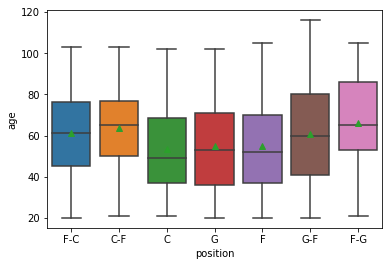

In [72]:
df['age'] = pd.DatetimeIndex(df['birth_date']).year